# Spotify music recommendation
* https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
* https://medium.com/analytics-vidhya/build-your-own-playlist-generator-with-spotifys-api-in-python-ceb883938ce4
* https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3
* https://medium.com/python-in-plain-english/music-recommendation-system-for-djs-d253d472677e
* https://github.com/tgel0/spotify-data
* https://towardsdatascience.com/a-visual-look-at-my-taste-in-music-a8c197a728be
* https://towardsdatascience.com/how-to-utilize-spotifys-api-and-create-a-user-interface-in-streamlit-5d8820db95d5
* https://medium.com/deep-learning-turkey/build-your-own-spotify-playlist-of-best-playlist-recommendations-fc9ebe92826a

Before diving in, let's play some music:

[Lucy in the Sky with Diamonds](https://open.spotify.com/track/25yQPHgC35WNnnOUqFhgVR)

In [1]:
lucy_id = "25yQPHgC35WNnnOUqFhgVR"
url = "https://open.spotify.com/track/"+lucy_id
import webbrowser
webbrowser.open(url)

True

## Spotipy

https://spotipy.readthedocs.io/


In [1]:
from secret import *
import os
os.environ["SPOTIPY_CLIENT_ID"] = clientId
os.environ["SPOTIPY_CLIENT_SECRET"] = clientSecret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [50]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()

In [51]:
sp = spotipy.Spotify(auth_manager = auth_manager)

### Search track

In [4]:
results = sp.search(q='track:'+'Lucy in the Sky',type='track')
items = results['tracks']['items']
if len(items) > 0:
    # tracks = items[0]
    for tracks in items:
        print(tracks['name'])

Lucy In The Sky With Diamonds - Remastered 2009
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds - Remix
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds - Remix
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds
Lucy in the Sky With Diamonds
Lucy In The Sky With Diamonds - Remastered 2009
Lucy in the Sky With Diamonds


In [5]:
track_name = results['tracks']['items'][0]['name']
track_name

'Lucy In The Sky With Diamonds - Remastered 2009'

In [6]:
track_id = results['tracks']['items'][0]['id']
track_id

'25yQPHgC35WNnnOUqFhgVR'

In [7]:
track_artist = results['tracks']['items'][0]['artists'][0]['name']
track_artist

'The Beatles'

In [8]:
track_artist_id = results['tracks']['items'][0]['artists'][0]['id']
track_artist_id

'3WrFJ7ztbogyGnTHbHJFl2'

In [9]:
track_album = results['tracks']['items'][0]['album']['name']
track_album

"Sgt. Pepper's Lonely Hearts Club Band (Remastered)"

In [10]:
track_album_id = results['tracks']['items'][0]['album']['id']
track_album_id

'6QaVfG1pHYl1z15ZxkvVDW'

In [12]:
img_album = results['tracks']['items'][0]['album']['images'][1]['url']
import requests
r = requests.get(img_album)
open('../img/'+track_id+'.jpg', 'wb').write(r.content)

67663

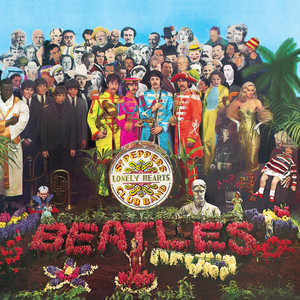

In [13]:
from IPython.display import Image
Image(filename='../img/'+track_id+'.jpg') 

### Get Track by id


![track dict](../img/track.png)

In [14]:
# Lucy in the Sky with Diamonds
lucy_id = '25yQPHgC35WNnnOUqFhgVR'
track = sp.track(lucy_id) 
# track
print(track['name']+' - '+track['album']['name'])

Lucy In The Sky With Diamonds - Remastered 2009 - Sgt. Pepper's Lonely Hearts Club Band (Remastered)


### Get Features

In [15]:
track_features = sp.audio_features(lucy_id)
track_features

[{'danceability': 0.311,
  'energy': 0.325,
  'key': 2,
  'loudness': -9.042,
  'mode': 1,
  'speechiness': 0.0283,
  'acousticness': 0.0469,
  'instrumentalness': 0,
  'liveness': 0.139,
  'valence': 0.668,
  'tempo': 65.09,
  'type': 'audio_features',
  'id': '25yQPHgC35WNnnOUqFhgVR',
  'uri': 'spotify:track:25yQPHgC35WNnnOUqFhgVR',
  'track_href': 'https://api.spotify.com/v1/tracks/25yQPHgC35WNnnOUqFhgVR',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25yQPHgC35WNnnOUqFhgVR',
  'duration_ms': 208467,
  'time_signature': 1}]

In [16]:
import pandas as pd
# df_features = spotifyAPI.parse_features(track_features)
df = pd.DataFrame(track_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0469,0.311,0.325,0,0.139,0.0283,0.668


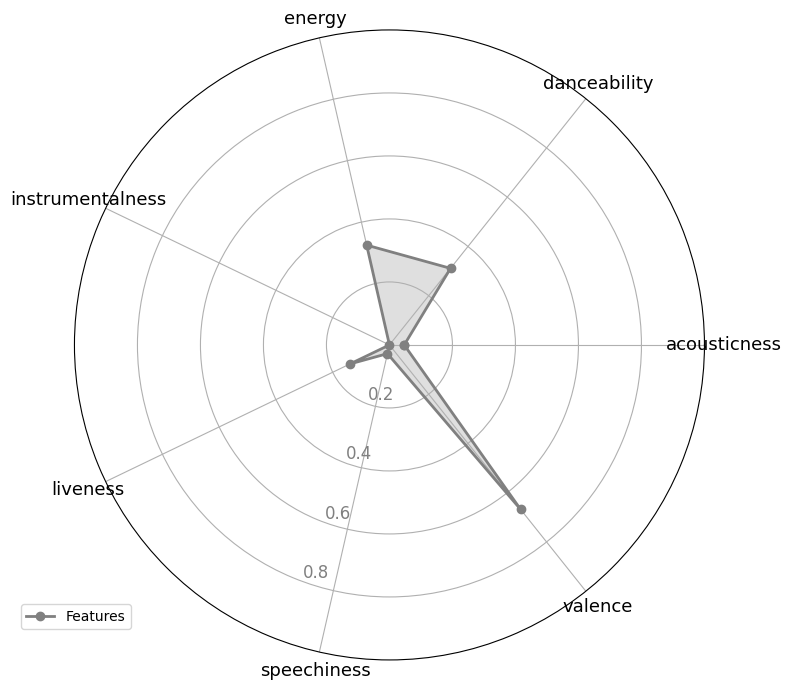

In [17]:
import spotifyAPI
spotifyAPI.feature_plot(df_features)

### Get recommendations 

In [18]:
token  = spotifyAPI.get_token(clientId,clientSecret)
json_response = spotifyAPI.get_track_reco(lucy_id,token)
uris =[]
for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

"Happiness Is A Warm Gun - Remastered 2009" by The Beatles
"25 or 6 to 4 - 2002 Remaster" by Chicago
"Blueberries For Breakfast" by The Mamas & The Papas
"I Can See For Miles - Mono Version" by The Who
"Slippin' And Slidin' - Single Version" by Buddy Holly
"Shangri-La" by Electric Light Orchestra
"Blue Sky" by Allman Brothers Band
"We Can Work It Out - Remastered 2015" by The Beatles
"Suzie Q" by Creedence Clearwater Revival
"Give Me Love (Give Me Peace On Earth)" by George Harrison


In [19]:
recolist = json_response['tracks']

In [25]:
recolist[0]['name']

'Happiness Is A Warm Gun - Remastered 2009'

In [26]:
recolist[0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [32]:
recolist[0]['album']['images']

[{'height': 640,
  'url': 'https://i.scdn.co/image/ab67616d0000b2734ce8b4e42588bf18182a1ad2',
  'width': 640},
 {'height': 300,
  'url': 'https://i.scdn.co/image/ab67616d00001e024ce8b4e42588bf18182a1ad2',
  'width': 300},
 {'height': 64,
  'url': 'https://i.scdn.co/image/ab67616d000048514ce8b4e42588bf18182a1ad2',
  'width': 64}]

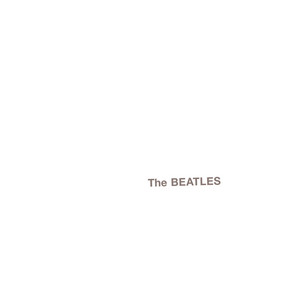

In [34]:
import requests
from IPython.display import Image
i = 0
track_url = recolist[i]['album']['images'][1]['url']
track_name = recolist[i]['name']
r = requests.get(track_url)
open('../img/'+track_name+'.jpg', 'wb').write(r.content)
Image(filename='../img/'+track_name+'.jpg') 


In [35]:
reco = pd.DataFrame(recolist)
reco

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,164546,False,{'isrc': 'GBAYE0601651'},{'spotify': 'https://open.spotify.com/track/71...,https://api.spotify.com/v1/tracks/71LsKf3xISiO...,71LsKf3xISiOlY1mj7FFPP,False,Happiness Is A Warm Gun - Remastered 2009,57,None,8,track,spotify:track:71LsKf3xISiOlY1mj7FFPP
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,289800,False,{'isrc': 'USRH10285518'},{'spotify': 'https://open.spotify.com/track/7G...,https://api.spotify.com/v1/tracks/7GqIDx2QVGOp...,7GqIDx2QVGOpd4r1fZaUUW,False,25 or 6 to 4 - 2002 Remaster,64,https://p.scdn.co/mp3-preview/8dbd7d656a9bf19e...,14,track,spotify:track:7GqIDx2QVGOpd4r1fZaUUW
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,180173,False,{'isrc': 'USMC17153794'},{'spotify': 'https://open.spotify.com/track/47...,https://api.spotify.com/v1/tracks/4713WnRYJ0AY...,4713WnRYJ0AY1qexk8o1Hd,False,Blueberries For Breakfast,51,None,12,track,spotify:track:4713WnRYJ0AY1qexk8o1Hd
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,247306,False,{'isrc': 'GBUM70818900'},{'spotify': 'https://open.spotify.com/track/7B...,https://api.spotify.com/v1/tracks/7B9F9nLxe7MZ...,7B9F9nLxe7MZgZ68Jj86Fn,False,I Can See For Miles - Mono Version,50,None,7,track,spotify:track:7B9F9nLxe7MZgZ68Jj86Fn
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,152960,False,{'isrc': 'USMC10300126'},{'spotify': 'https://open.spotify.com/track/5B...,https://api.spotify.com/v1/tracks/5BkQobFagZCB...,5BkQobFagZCBgtTgaTbute,False,Slippin' And Slidin' - Single Version,46,None,5,track,spotify:track:5BkQobFagZCBgtTgaTbute
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,335360,False,{'isrc': 'USSM17800856'},{'spotify': 'https://open.spotify.com/track/6p...,https://api.spotify.com/v1/tracks/6p48AsXt0IBC...,6p48AsXt0IBCamEdRPngjb,False,Shangri-La,44,https://p.scdn.co/mp3-preview/d4f90b6ae0e3c636...,9,track,spotify:track:6p48AsXt0IBCamEdRPngjb
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,311703,False,{'isrc': 'USPR37230034'},{'spotify': 'https://open.spotify.com/track/6i...,https://api.spotify.com/v1/tracks/6iX1QW1gGIVN...,6iX1QW1gGIVNEItnqyvFfH,False,Blue Sky,59,None,8,track,spotify:track:6iX1QW1gGIVNEItnqyvFfH
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,135693,False,{'isrc': 'GBUM71505915'},{'spotify': 'https://open.spotify.com/track/1h...,https://api.spotify.com/v1/tracks/1hTUFqJuQAMj...,1hTUFqJuQAMjXVGwUPWDqi,False,We Can Work It Out - Remastered 2015,60,None,13,track,spotify:track:1hTUFqJuQAMjXVGwUPWDqi
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,517159,False,{'isrc': 'USC4R0817579'},{'spotify': 'https://open.spotify.com/track/6J...,https://api.spotify.com/v1/tracks/6Jp0GuFxAYbT...,6Jp0GuFxAYbTdre1uUPgaB,False,Suzie Q,55,None,3,track,spotify:track:6Jp0GuFxAYbTdre1uUPgaB
9,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, 

### Artist albums

In [41]:
import pandas as pd
artists = pd.read_csv('../data/spotify-artist-uris.csv', header=None, index_col=0).squeeze("columns").to_dict()

In [42]:
mj_uri = artists['Michael Jackson']

results = sp.artist_albums(mj_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Scream
XSCAPE
XSCAPE
XSCAPE - Track by Track Commentary
Michael
Gold
Invincible
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
HIStory - PAST, PRESENT AND FUTURE - BOOK I
HIStory - PAST, PRESENT AND FUTURE - BOOK I
Dangerous
Bad (Remastered)
Bad 25th Anniversary
Thriller
Thriller
Thriller 25 Super Deluxe Edition
Off the Wall
Forever Michael
Forever, Michael
Music And Me
Music & Me
Music and Me
Ben
Ben
Got To Be There
Got To Be There


In [43]:
url = "https://open.spotify.com/artist/"+mj_uri.replace('spotify:artist:','')
import webbrowser
webbrowser.open(url)

True

### Artist top tracks

In [55]:
import ipywidgets as widgets
artist = widgets.Text(value='Led Zeppelin',disabled=False)
artist

Text(value='Led Zeppelin')

In [52]:
# how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:
lz_uri = artists[artist.value]

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:3]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/fc80a280376d5142c888475bd8fdcd00b4fc8d7d?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/e5910b86cc788766388cca1c494094e39186aa1e?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/f3765a6c5b194302c6e7fffc31ba21e2bd616cf6?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d



### [Advanced Search](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search)

_search(q, limit=10, offset=0, type='track', market=None)_

**Parameters**:
* q - the search query (see how to write a query in the
official documentation https://developer.spotify.com/documentation/web-api/reference/search/search/) # noqa
* limit - the number of items to return (min = 1, default = 10, max = 50)
* offset - the index of the first item to return
* type - the type of item to return. One of ‘artist’, ‘album’,
‘track’, ‘playlist’, ‘show’, or ‘episode’
* market - An ISO 3166-1 alpha-2 country code or the string
from_token.

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

The following code collects 1,000 Track IDs and their associated track name, artist name, and popularity score.
(it does not require a Spotify ID)

In [ ]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

### Current user

In [57]:
username = '1146603936'
user = sp.user(user = username)
user

{'display_name': 'Yann Debray',
 'external_urls': {'spotify': 'https://open.spotify.com/user/1146603936'},
 'followers': {'href': None, 'total': 2},
 'href': 'https://api.spotify.com/v1/users/1146603936',
 'id': '1146603936',
 'images': [{'height': None,
   'url': 'https://scontent-ord5-1.xx.fbcdn.net/v/t1.6435-1/67559378_10158614358493056_9107852822640066560_n.jpg?stp=c0.0.320.320a_dst-jpg_p320x320&_nc_cat=105&ccb=1-7&_nc_sid=0c64ff&_nc_ohc=1ZBql8uXn_oAX8OUB1I&_nc_ht=scontent-ord5-1.xx&edm=AP4hL3IEAAAA&oh=00_AfCjl1GwXb0sGSgx7gb8f3ImLl6LdVp9fGJm8R6hI97obw&oe=6389E07B',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:1146603936'}

In [65]:
from IPython.display import Image
url = user['images'][0]['url']
Image(url=url) 

## Access Scopes

* Images
  * [ugc-image-upload](https://developer.spotify.com/documentation/general/guides/scopes/#ugc-image-upload)
* Spotify Connect
  * [user-read-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-state)
  * [user-modify-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-modify-playback-state)
  * [user-read-currently-playing](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-currently-playing)
* Playback
  * [streaming](https://developer.spotify.com/documentation/general/guides/scopes/#streaming)
  * [app-remote-control](https://developer.spotify.com/documentation/general/guides/scopes/#app-remote-control)
* Users
  * [user-read-email](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-email)
  * [user-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-private)
* Playlists
  * [playlist-read-collaborative](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-collaborative)
  * [playlist-modify-public](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-public)
  * [playlist-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-private)
  * [playlist-modify-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-private)
* Library
  * [user-library-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-modify)
  * [user-library-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-read)
* Listening History
  * [user-top-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-top-read)
  * [user-read-playback-position](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-position)
  * [user-read-recently-played](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-recently-played)
* Follow
  * [user-follow-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-read)
  * [user-follow-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-modify)

### Recently played

https://developer.spotify.com/console/get-recently-played/

In [66]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-read-recently-played"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_recently_played(limit=50)
results['items']
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Michael Jackson  –  Billie Jean
1 Anne-Marie  –  Birthday - Acoustic
2 Landon Austin  –  Never Let You Go (Acoustic)
3 Emily Hall  –  Stupid Love - Acoustic Cover
4 Maisie Peters  –  Maybe Don't (feat. JP Saxe)
5 Ben Woodward  –  Memories (Acoustic)
6 Janie  –  La Macarena
7 Ed Sheeran  –  Autumn Leaves - Deluxe Edition
8 John Mayer  –  Gravity
9 Jethro Tull  –  Locomotive Breath
10 Miley Cyrus  –  Angels Like You
11 The Common Linnets  –  Calm After The Storm - Radio Edit
12 Selena Gomez  –  Kill Em With Kindness
13 Selena Gomez  –  Kill Em With Kindness
14 Charlie Puth  –  Attention - Acoustic
15 Labrinth  –  Beneath Your Beautiful (feat. Emeli Sandé)
16 Milow  –  Against the Tide
17 Mr. Probz  –  Waves - Robin Schulz Radio Edit
18 Shawn Mendes  –  Señorita
19 Billy Joel  –  Vienna
20 Janie  –  Compile
21 Janie  –  La Macarena
22 Janie  –  Petite blonde - Radio edit
23 Janie  –  Petite blonde - Radio edit
24 Janie  –  Piano coccinelle
25 Janie  –  Depuis samedi
26 Janie  –  Petite 

In [67]:
import json
with open("../data/recently_played_20221103.json","w") as f:
    json.dump(results,f,indent=4)

In [68]:
tracks = []
for idx, item in enumerate(results['items']):
    track = item['track']
    tracks.append([idx, track['artists'][0]['name'], track['name']])
tracks[0:5]

[[0, 'Michael Jackson', 'Billie Jean'],
 [1, 'Anne-Marie', 'Birthday - Acoustic'],
 [2, 'Landon Austin', 'Never Let You Go (Acoustic)'],
 [3, 'Emily Hall', 'Stupid Love - Acoustic Cover'],
 [4, 'Maisie Peters', "Maybe Don't (feat. JP Saxe)"]]

In [69]:
trackDict = {"id":[], "artist":[],"name":[]}
for idx, item in enumerate(results['items']):
    track = item['track']
    trackDict["id"].append(idx)
    trackDict["artist"].append(track['artists'][0]['name'])
    trackDict["name"].append(track['name'])


In [70]:
import pandas as pd
trackDf = pd.DataFrame.from_dict(trackDict)
trackDf

,id,artist,name
0,0,Michael Jackson,Billie Jean
1,1,Anne-Marie,Birthday - Acoustic
2,2,Landon Austin,Never Let You Go (Acoustic)
3,3,Emily Hall,Stupid Love - Acoustic Cover
4,4,Maisie Peters,Maybe Don't (feat. JP Saxe)
5,5,Ben Woodward,Memories (Acoustic)
6,6,Janie,La Macarena
7,7,Ed Sheeran,Autumn Leaves - Deluxe Edition
8,8,John Mayer,Gravity
9,9,Jethro Tull,Locomotive Breath


### Saved Tracks

In [71]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

auth_user = SpotifyOAuth(scope=scope, username=username)
auth_user.get_cached_token()

In [72]:
from spotipy import util
token = util.prompt_for_user_token(username=username)

In [73]:
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Janie  –  La Macarena
1 Lilly Wood and The Prick  –  Prayer In C (Robin Schulz Remix) [Radio Edit]
2 Pink Floyd  –  Shine On You Crazy Diamond (Parts 1 - 5) [Edit] [2011 Remastered Version]
3 Kate Bush  –  Running Up That Hill (A Deal With God)
4 Charlie Puth  –  Attention - Acoustic
5 Aya Nakamura  –  Dégaine (feat. Damso)
6 Stephen Puth  –  Crying My Eyes Out - Acoustic
7 ROSALÍA  –  LA FAMA (with The Weeknd)
8 Camila Cabello  –  Bam Bam (feat. Ed Sheeran)
9 Justin Bieber  –  Off My Face
10 Shawn Mendes  –  Like To Be You (feat. Julia Michaels)
11 Selena Gomez  –  Lose You To Love Me
12 Shawn Mendes  –  It'll Be Okay
13 Justin Wellington  –  Iko Iko (My Bestie)
14 Jawsh 685  –  Savage Love (Laxed - Siren Beat)
15 Dennis Lloyd  –  Alien - Acoustic
16 Ella Henderson  –  Let’s Go Home Together - Stripped
17 James Arthur  –  Emily
18 OneRepublic  –  Something I Need
19 Shawn Mendes  –  Wonder


In [74]:
import json
with open("../data/saved_tracks_20221103.json","w") as f:
    json.dump(results,f,indent=4)

load previous results

In [75]:
with open("../data/saved_tracks_20221103.json","r") as f:
    results = json.load(f)

In [76]:
saved_tracks1 = results["items"][0]["track"]
saved_tracks1.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [77]:
import pandas as pd
df = pd.DataFrame.from_dict(results["items"])
df.head(5)

,added_at,track
0,2022-11-01T21:34:40Z,"{'album': {'album_type': 'album', 'artists': [..."
1,2022-10-31T12:16:36Z,"{'album': {'album_type': 'album', 'artists': [..."
2,2022-07-20T23:12:42Z,"{'album': {'album_type': 'compilation', 'artis..."
3,2022-06-25T09:58:36Z,"{'album': {'album_type': 'album', 'artists': [..."
4,2022-06-21T08:10:55Z,"{'album': {'album_type': 'single', 'artists': ..."


In [78]:
tracks = []
for idx, item in enumerate(results['items']):
    track = item['track']
    tracks.append([idx, track['artists'][0]['name'], track['name']])

In [79]:
tracks[0:5]

[[0, 'Janie', 'La Macarena'],
 [1,
  'Lilly Wood and The Prick',
  'Prayer In C (Robin Schulz Remix) [Radio Edit]'],
 [2,
  'Pink Floyd',
  'Shine On You Crazy Diamond (Parts 1 - 5) [Edit] [2011 Remastered Version]'],
 [3, 'Kate Bush', 'Running Up That Hill (A Deal With God)'],
 [4, 'Charlie Puth', 'Attention - Acoustic']]

### Saved Albums
https://developer.spotify.com/console/get-current-user-saved-albums

In [80]:
results = sp.current_user_saved_albums(limit=20)
# results
# results['items'][0]
for idx, item in enumerate(results['items']):
    album = item['album']
    print(idx, album['artists'][0]['name'])

0 Janie
1 Lady Gaga
2 The Cast of Netflix's Film tick, tick... BOOM!
3 Maroon 5
4 Queen
5 Joshua Radin
6 Lady Gaga
7 Meghan Trainor
8 Maroon 5
9 David Bowie


### Playlist
https://developer.spotify.com/console/get-current-user-playlists/

In [29]:
scope = "playlist-read-private"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_playlists(limit=50)
results['items'][0]
for idx, item in enumerate(results['items']):
    print(idx, item['name'], " – public: ", item['public'])

0 Laidback Acoustic  – public:  False
1 Top 100 Play Music  – public:  True
2 Acoustic Blues Country Guitar  – public:  True
3 Piano Ballads  – public:  False
4 Nelson Recommended Tracks  – public:  True
5 Blind test  – public:  True
6 Discover Weekly  – public:  False
7 Sélection  – public:  True
8 Radio-Favoriten  – public:  True
9 Best  – public:  False
10 First 36.7  – public:  False
11 Gadz'Art  – public:  False
12 House  – public:  False
13 Jazz  – public:  False
14 Muscu  – public:  False
15 Musique films  – public:  False
16 news  – public:  False
17 On-the-go 1  – public:  False
18 On-the-go 2  – public:  False
19 On-the-go 3  – public:  False
20 On-the-go 4  – public:  False
21 On-the-go 5  – public:  False
22 On-the-go 6  – public:  False
23 Rap US  – public:  False
24 Sands  – public:  False
25 Scrubs  – public:  False
26 Trance  – public:  False
27 US variety  – public:  False
28 We were here  – public:  False


#### Add tracks to playlist

In [102]:
import pandas as pd

top100 = pd.read_csv('top100id.csv',index_col=0)
top100.head()

,title,album,artist,time,stars,played,deleted,id
485,In the Sun,Grey&#39;s Anatomy Soundtrack,Chris Martin ft. Michael Stipe,229000,5,71,NaN,2MLHyLy5z5l5YRp7momlgw
983,Some Kind Of Wonderful,Grand Theft Auto: San Andreas OST,Grand Funk Railroad,203000,4,70,NaN,1cU34sZG9kF4FYHCoAD0Ib
1111,Today,First between 3rd and 4th,Joshua Radin,217000,5,69,NaN,0u5aO1GYsIhAWCPuXdwnak
1237,You Know My Name,James Bond Themes,Chris Cornell,242466,4,58,NaN,0Dlm41iXvTsIVsEOce3yX6
263,Don&#39;t panic,Garden state [Soundtrack],Coldplay,137000,4,49,NaN,NaN


In [106]:
track_id = top100.id
track_id = track_id.dropna()
track_id

485     2MLHyLy5z5l5YRp7momlgw
983     1cU34sZG9kF4FYHCoAD0Ib
1111    0u5aO1GYsIhAWCPuXdwnak
1237    0Dlm41iXvTsIVsEOce3yX6
252     2M7UdnD0fEaryh8TnCvqFX
                 ...          
1000    5VaJ9leHPd2aDgvrGBMD39
30      3H3cOQ6LBLSvmcaV7QkZEu
1139    6a899bXlCuViXW2Qs8Rdqo
250     5MbNAHqNksNDycMZ0WUaO5
350     7asyVbwQE7IbA3x2be7bdI
Name: id, Length: 81, dtype: object

In [107]:
scope = 'playlist-modify-public'

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

playlist_id = "2hNrDKdSNh889LLYEmR1DK"
sp.playlist_add_items(playlist_id,track_id)

{'snapshot_id': 'MiwzNDFiYWM2ODM2ODU4YTc4OTNhMDZiODlkMWEzODQ1ODI0OGQ1Yjcw'}

In [90]:
### Get playlist by Id
import requests
playlistId = "2hNrDKdSNh889LLYEmR1DK" # Top 100 Play Music
playlistUrl = f"https://api.spotify.com/v1/playlists/{playlistId}"

headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=playlistUrl, headers=headers)
import json
with open('playlist.json', 'w') as outfile:
    json.dump(res.json(), outfile, indent=2)
# print(json.dumps(res.json(), indent=2))

## Parse Streaming History

In [81]:
import ast
from typing import List
from os import listdir
files = '../spotifyData/StreamingHistory0.json'

all_streamings = []

with open(files, 'r', encoding='UTF-8') as f:
    new_streamings = ast.literal_eval(f.read())
    all_streamings += [streaming for streaming 
                        in new_streamings]
all_streamings[0]

{'endTime': '2020-06-10 16:56',
 'artistName': 'Alphaville',
 'trackName': 'Forever Young',
 'msPlayed': 35538}

In [82]:
unique_tracks = list(set([streaming['trackName'] 
                for streaming in all_streamings]))
unique_tracks[0]

'All Over Town'

In [83]:
import spotifyAPI

all_features = {}
for track in unique_tracks:
    track_id = spotifyAPI.get_track_id(track, token)
    features = spotifyAPI.get_features(track_id, token)
    if features:
        all_features[track] = features

In [84]:
with_features = []
for track_name, features in all_features.items():
    with_features.append({'name': track_name, **features})

In [85]:
import pandas as pd
df = pd.DataFrame(with_features)
df.to_csv('../data/streaming_history.csv')

In [86]:
df

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,All Over Town,0.582,0.236,8,-8.979,1,0.0311,0.8580,0.000000,0.0878,0.235,63.675,audio_features,1oz7yTFGbsZdoIL1u75d0O,spotify:track:1oz7yTFGbsZdoIL1u75d0O,https://api.spotify.com/v1/tracks/1oz7yTFGbsZd...,https://api.spotify.com/v1/audio-analysis/1oz7...,193742,4
1,Lost Stars,0.498,0.583,0,-4.762,1,0.0274,0.1050,0.000000,0.0698,0.400,82.071,audio_features,22VjpPvok4jeoRjWlQThZr,spotify:track:22VjpPvok4jeoRjWlQThZr,https://api.spotify.com/v1/tracks/22VjpPvok4je...,https://api.spotify.com/v1/audio-analysis/22Vj...,267920,4
2,Sous le vent,0.495,0.501,11,-7.511,1,0.0449,0.4990,0.000000,0.0973,0.303,140.616,audio_features,6VZB0ttlqGjpGMAcaomXh9,spotify:track:6VZB0ttlqGjpGMAcaomXh9,https://api.spotify.com/v1/tracks/6VZB0ttlqGjp...,https://api.spotify.com/v1/audio-analysis/6VZB...,211293,4
3,Hurricane,0.372,0.915,11,-4.577,1,0.0850,0.0640,0.000110,0.1260,0.466,91.124,audio_features,1SlLP2AI4L2oh3VRJfHBpf,spotify:track:1SlLP2AI4L2oh3VRJfHBpf,https://api.spotify.com/v1/tracks/1SlLP2AI4L2o...,https://api.spotify.com/v1/audio-analysis/1SlL...,153222,3
4,Knocking on Heavens Door,0.496,0.739,6,-7.193,1,0.0415,0.0211,0.004440,0.1060,0.378,132.410,audio_features,4JiEyzf0Md7KEFFGWDDdCr,spotify:track:4JiEyzf0Md7KEFFGWDDdCr,https://api.spotify.com/v1/tracks/4JiEyzf0Md7K...,https://api.spotify.com/v1/audio-analysis/4JiE...,336000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Be Yourself,0.423,0.845,11,-3.509,0,0.0559,0.1430,0.000005,0.2130,0.317,116.602,audio_features,3zwmW1gM4E8FlHXV5nE16u,spotify:track:3zwmW1gM4E8FlHXV5nE16u,https://api.spotify.com/v1/tracks/3zwmW1gM4E8F...,https://api.spotify.com/v1/audio-analysis/3zwm...,278973,4
61,Take Five,0.454,0.260,8,-13.193,0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,audio_features,1YQWosTIljIvxAgHWTp7KP,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133,5
62,Flake,0.758,0.654,5,-10.980,1,0.0400,0.6620,0.019700,0.1990,0.962,97.657,audio_features,7hOXiS6kDP4vYIh9DBsNgK,spotify:track:7hOXiS6kDP4vYIh9DBsNgK,https://api.spotify.com/v1/tracks/7hOXiS6kDP4v...,https://api.spotify.com/v1/audio-analysis/7hOX...,281749,4
63,Californication,0.592,0.767,9,-2.788,0,0.0270,0.0021,0.001650,0.1270,0.328,96.483,audio_features,48UPSzbZjgc449aqz8bxox,spotify:track:48UPSzbZjgc449aqz8bxox,https://api.spotify.com/v1/tracks/48UPSzbZjgc4...,https://api.spotify.com/v1/audio-analysis/48UP...,329733,4


## Music Taste Analysis
Inspiration:
* [article](https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc)
* [repo](https://github.com/jmcabreira/A-Music-Taste-Analysis-Using-Spotify-API-and-Python.)

In [87]:
features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.8580,0.582,0.236,0.000000,0.0878,0.0311,0.235
1,0.1050,0.498,0.583,0.000000,0.0698,0.0274,0.400
2,0.4990,0.495,0.501,0.000000,0.0973,0.0449,0.303
3,0.0640,0.372,0.915,0.000110,0.1260,0.0850,0.466
4,0.0211,0.496,0.739,0.004440,0.1060,0.0415,0.378
...,...,...,...,...,...,...,...
60,0.1430,0.423,0.845,0.000005,0.2130,0.0559,0.317
61,0.5390,0.454,0.260,0.000780,0.0675,0.0401,0.598
62,0.6620,0.758,0.654,0.019700,0.1990,0.0400,0.962
63,0.0021,0.592,0.767,0.001650,0.1270,0.0270,0.328


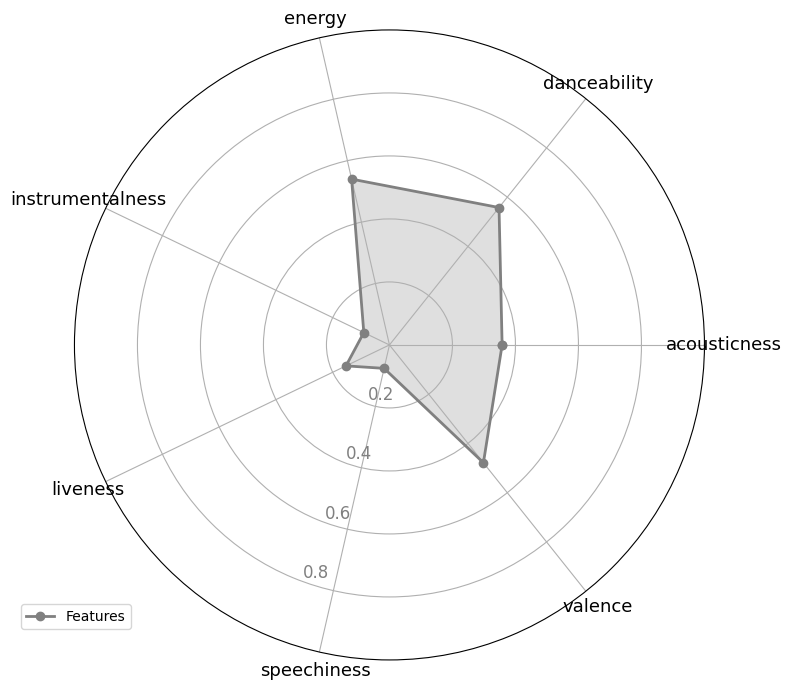

In [88]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

labels= list(features)[:]
stats= features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
